In [1]:
import numpy as np
import cv2
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.figure
from matplotlib import mlab
import os
import json
import sys 

In [2]:
numbersFile = "../Logs/faceNumbersPass2.pk"
visitedList = "../Logs/eyesExtracted.data"

In [3]:
lists = []
infile = open(numbersFile, 'r')
while 1:
    try:
        lists.append(pickle.load(infile))
    except (EOFError):
        break
infile.close()

In [4]:
PostID = np.zeros((len(lists),1) , dtype='i8')
posts = []
totFrames = np.zeros((len(lists),1) , dtype='i8')
faceFrames = np.zeros((len(lists),1) , dtype='i8')
profileFrames = np.zeros((len(lists),1) , dtype='i8')
for i in range(len(lists)):
    log = lists[i].split(',')
    PostID[i] = int(log[0])
    posts.append(int(log[0]))
    totFrames[i] = int(log[1])
    faceFrames[i] = int(log[2])
    profileFrames[i] = int(log[3])

print PostID.shape

(1789, 1)


In [5]:
percentages = np.zeros((len(PostID),1))
frontalPercentages = np.zeros((len(PostID),1))
profilePercentages = np.zeros((len(PostID),1))
for i in range(len(PostID)):
    percentages[i] = float(max(faceFrames[i],profileFrames[i])/float(totFrames[i]))
    frontalPercentages[i] = float(faceFrames[i])/float(totFrames[i])
    profilePercentages[i] = float(profileFrames[i])/float(totFrames[i])

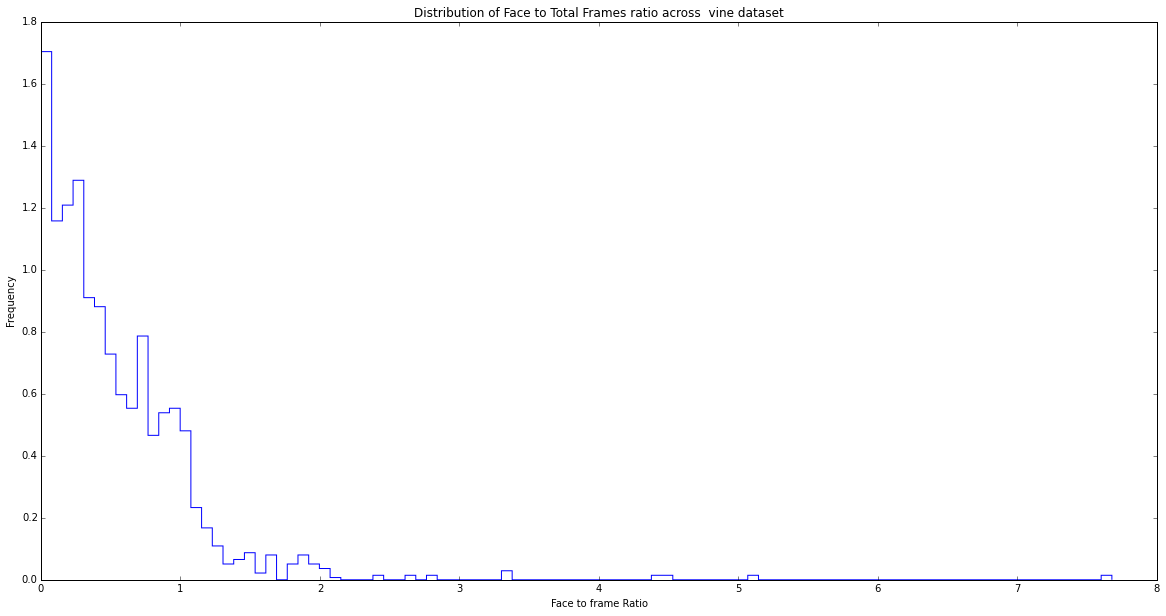

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(percentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face to Total Frames ratio across  vine dataset")
plt.xlabel("Face to frame Ratio")
plt.ylabel("Frequency")
plt.show()


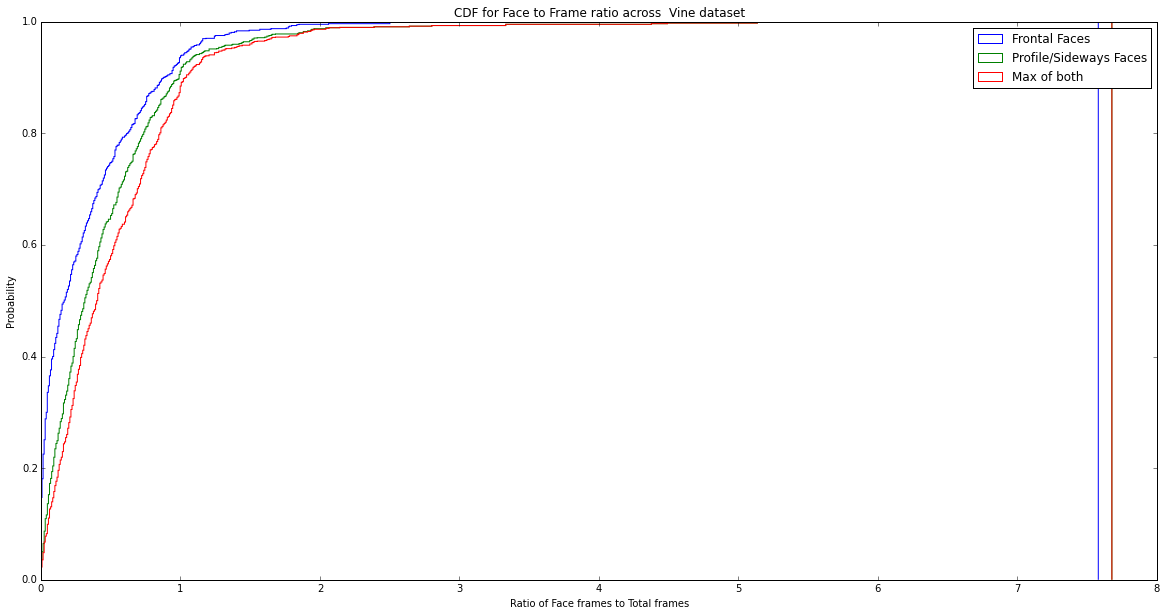

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(frontalPercentages, 1000, normed=1,histtype='step', cumulative=True)
plt.hist(profilePercentages, 1000, normed=1,histtype='step', cumulative=True)
plt.hist(percentages, 1000, normed=1,histtype='step', cumulative=True)
plt.title("CDF for Face to Frame ratio across  Vine dataset")
plt.xlabel("Ratio of Face frames to Total frames")
plt.ylabel("Probability")
plt.legend(['Frontal Faces', 'Profile/Sideways Faces' , 'Max of both'])
plt.show()


In [8]:
print np.mean(percentages)
print np.median(percentages)
print np.var(percentages)
print np.mean(frontalPercentages)
print np.median(frontalPercentages)
print np.var(frontalPercentages)
print np.mean(profilePercentages)
print np.median(profilePercentages)
print np.var(profilePercentages)

0.534753551155
0.405405405405
0.315516980398
0.332046527011
0.173469387755
0.207263698631
0.462048331133
0.319018404908
0.303583932199


In [9]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    f = open(rootDir + '/popular.json' ,'r')
    data = json.load(f)
    return data

    
    
def getPopularPosts(popular , loopThreshold):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

def getRecords(popular):
    records = popular['data']['records']
    return records

In [31]:
root = "../vinedata/Data/"
dirs,files = walkLevel1Dir(root)
visited = getVisited()
selectedPosts = []
allPosts = []


for d in dirs:
    if d in visited:
        dataRoot = root + d
        print "Visiting: " + dataRoot
        popular = getPopularFile(dataRoot)
        popposts = getPopularPosts(popular , 1000)
        selectedPosts += popposts
        rec = getRecords(popular)
        allPosts += rec
        #


Visiting: ../vinedata/Data/1449016201
Visiting: ../vinedata/Data/1448816402
Visiting: ../vinedata/Data/1448854202
Visiting: ../vinedata/Data/1449057602
Visiting: ../vinedata/Data/1448942401
Visiting: ../vinedata/Data/1448951401
Visiting: ../vinedata/Data/1451412008
Visiting: ../vinedata/Data/1448762402
Visiting: ../vinedata/Data/1450256408
Visiting: ../vinedata/Data/1448775001
Visiting: ../vinedata/Data/1448769601
Visiting: ../vinedata/Data/1449127802
Visiting: ../vinedata/Data/1451260803
Visiting: ../vinedata/Data/1449025201
Visiting: ../vinedata/Data/1449043201
Visiting: ../vinedata/Data/1448737202
Visiting: ../vinedata/Data/1448865003
Visiting: ../vinedata/Data/1448650072
Visiting: ../vinedata/Data/1450364402
Visiting: ../vinedata/Data/1451282402
Visiting: ../vinedata/Data/1449072002
Visiting: ../vinedata/Data/1450418401
Visiting: ../vinedata/Data/1449052202


In [32]:
print len(selectedPosts)
print len(allPosts)

815
1597


In [33]:
selectedIDs = np.zeros((len(selectedPosts),1),dtype='i8')
for i in range(len(selectedPosts)):
    selectedIDs[i] = int(selectedPosts[i]['postId'])

In [34]:
likeCount = np.zeros((len(allPosts),1))
repostCount = np.zeros((len(allPosts),1))
for i in range(len(allPosts)):
    likeCount[i] = allPosts[i]['likes']['count']
    repostCount[i] = allPosts[i]['reposts']['count']


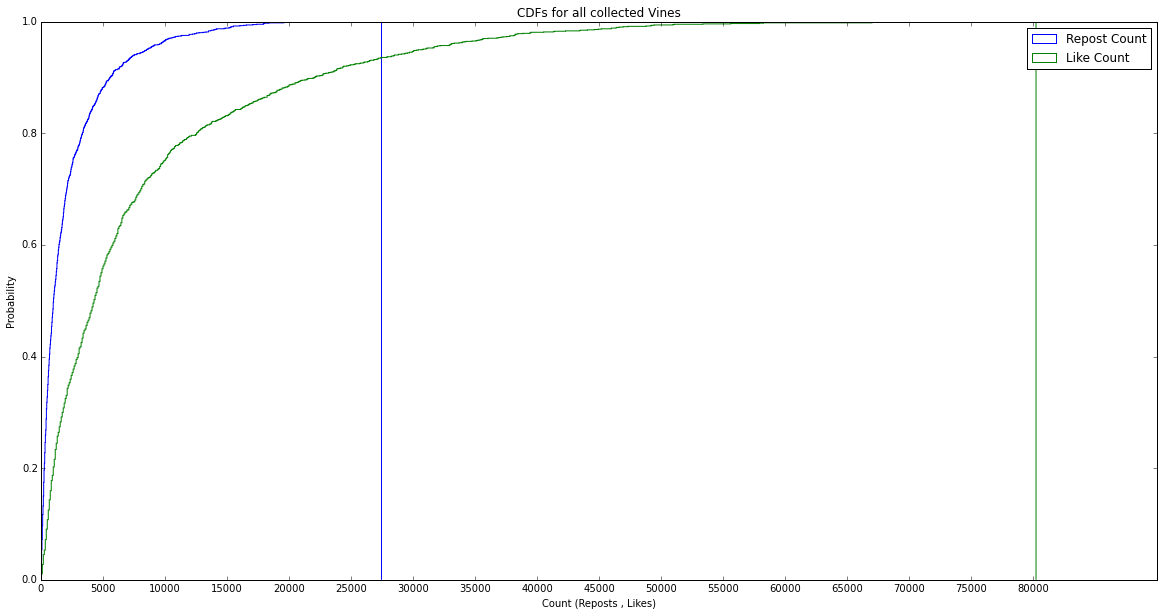

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(repostCount , 1000 , normed =1 , histtype='step' , cumulative=True)
plt.hist(likeCount , 1000 , normed =1 , histtype='step' , cumulative=True)
plt.xticks(np.arange(0, max(likeCount), 5000))
plt.title("CDFs for all collected Vines")
plt.xlabel("Count (Reposts , Likes)")
plt.ylabel("Probability")
plt.legend(['Repost Count', 'Like Count'])
plt.show()

In [36]:
print np.mean(likeCount)
print np.median(likeCount)
print np.mean(repostCount)
print np.median(repostCount)

8026.14777708
4317.0
2174.19035692
1030.0


In [58]:
intersection = np.in1d(selectedIDs, PostID )
# indices = []
# for p in selectedPosts:
#     for i in range(len(posts)):
#         if p['postId'] in posts:
#             indices.append(posts.index(p['postId']))
#             break

indices = []
for i in range(len(intersection)):
    if(intersection[i]):
        indices.append(i)

print indices

[0, 1, 2, 3, 4, 6, 8, 10, 11, 13, 14, 16, 19, 23, 25, 26, 29, 31, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 153, 155, 156, 157, 161, 164, 169, 173, 183, 196, 197, 198, 200, 201, 205, 208, 212, 213, 216, 221, 224, 229, 232, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 343, 352, 354, 355, 356, 357, 358, 426, 427, 428, 429, 430, 431, 43

In [59]:
print len(selectedPosts)
print len(indices)
print PostID.shape
print selectedIDs.shape

815
527
(1789, 1)
(815, 1)


In [60]:

selPercentages = np.zeros((len(indices),1))
selFrontalPercentages = np.zeros((len(indices),1))
selProfilePercentages = np.zeros((len(indices),1))

for i in range(len(indices)):
    selPercentages[i] = float(max(faceFrames[i],profileFrames[i]))/float(totFrames[indices[i]])
    selProfilePercentages[i] = float(profileFrames[i])/float(totFrames[indices[i]])
    selFrontalPercentages[i] = float(faceFrames[i])/float(totFrames[indices[i]])

selRepost = np.zeros((len(indices),1))
selLikes = np.zeros((len(indices),1))

for i in range(len(indices)):
    selRepost[i] = allPosts[indices[i]]['reposts']['count']
    selLikes[i] = allPosts[indices[i]]['likes']['count']

In [61]:
print min(selRepost)
print min(selLikes)


[ 0.]
[ 29.]


In [62]:
likesNormed = selLikes / selLikes.max(axis=0)
repostNormed = selRepost / selRepost.max(axis=0)

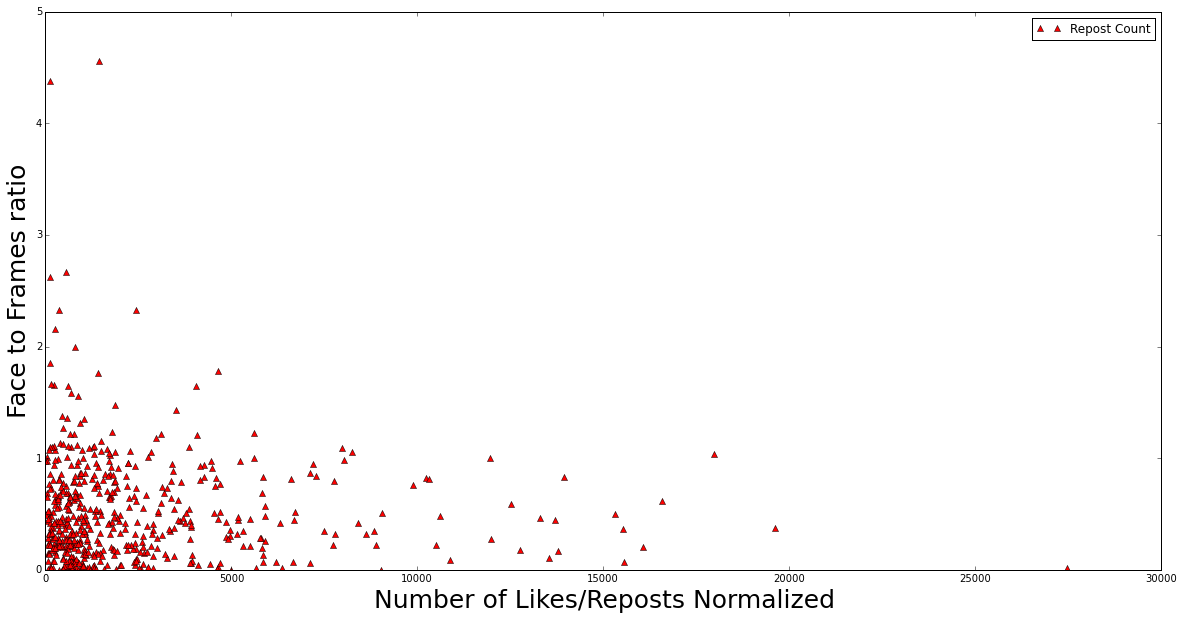

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
#plt.plot(likesNormed , selPercentages,'*g' )
plt.plot(selRepost , selPercentages , '^r' )

plt.xlabel('Number of Likes/Reposts Normalized',fontsize = 25)
plt.ylabel('Face to Frames ratio', fontsize = 25)
plt.legend(['Repost Count'])
plt.show()

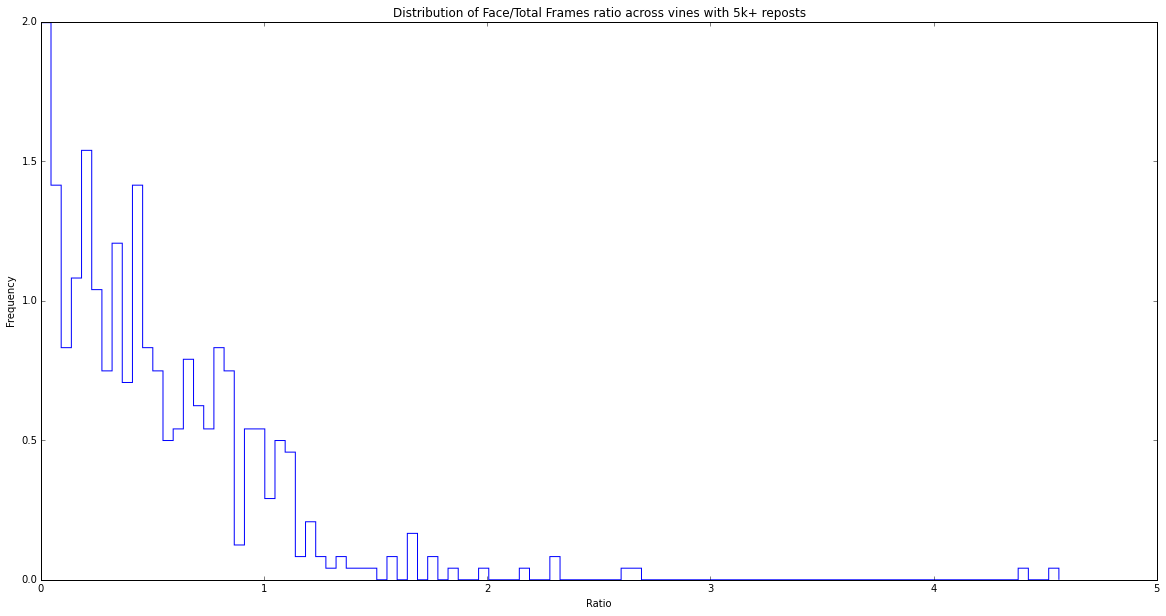

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
plt.hist(selPercentages , 100 , normed =1 , histtype='step' , cumulative=False)
plt.title("Distribution of Face/Total Frames ratio across vines with 5k+ reposts")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.show()


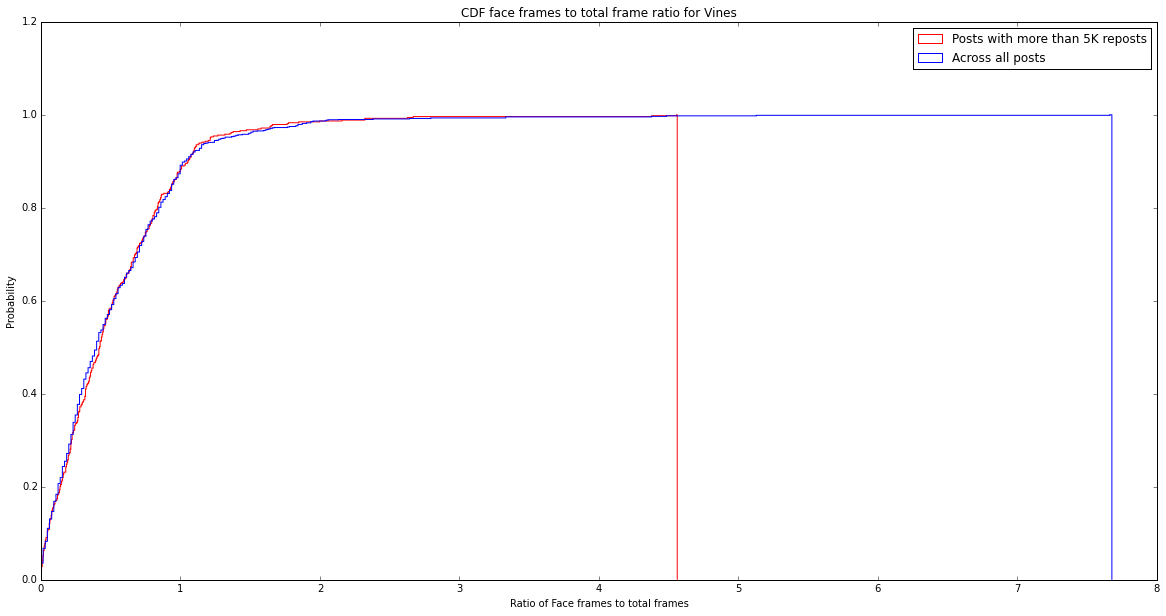

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
hist1 = plt.hist(selPercentages, 1000, normed=1,histtype='step', cumulative=True ,color='r')
hist2 = plt.hist(percentages, 500, normed=1,histtype='step', cumulative=True , color='b')

# y = mlab.normpdf(bins, percentages).cumsum()
# y /= y[-1]
#plt.plot(bins, n, 'k--', linewidth=1.5)
plt.title("CDF face frames to total frame ratio for Vines")
plt.xlabel("Ratio of Face frames to total frames")
plt.ylabel("Probability")
plt.legend(['Posts with more than 5K reposts', 'Across all posts'])
plt.show()

In [66]:
print np.mean(selPercentages)
print np.median(selPercentages)
print np.var(selPercentages)

0.521674873748
0.423469387755
0.239699139528
